In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
dados = pd.read_csv('data/tips.csv')
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [27]:
gorjetas = dados.rename(columns = {'total_bill':'valor_da_conta', 'tip':'gorjeta','dessert':'sobremesa','day':'dia_da_semana','time':'hora_do_dia','size':'total_de_pessoas'})

In [29]:
dados.head(1)

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2


In [30]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2


In [32]:
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [33]:
sim_não = {'No':'Não', 'Yes':'Sim'}

In [38]:
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_não)
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Sun,Dinner,2
1,10.34,1.66,Não,Sun,Dinner,3
2,21.01,3.50,Não,Sun,Dinner,3
3,23.68,3.31,Não,Sun,Dinner,2
4,24.59,3.61,Não,Sun,Dinner,4


In [40]:
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [41]:
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map({'Sun':'Domingo', 'Sat':'Sábado', 'Thur':'Quinta', 'Fri':'Sexta'})

In [44]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Dinner,2
1,10.34,1.66,Não,Domingo,Dinner,3
2,21.01,3.50,Não,Domingo,Dinner,3
3,23.68,3.31,Não,Domingo,Dinner,2
4,24.59,3.61,Não,Domingo,Dinner,4


In [47]:
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

In [48]:
gorjetas.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [49]:
gorjetas.hora_do_dia = gorjetas.hora_do_dia.map({'Dinner':'Jantar', 'Lunch':'Almoço'})
gorjetas.hora_do_dia.unique()

array(['Jantar', 'Almoço'], dtype=object)

In [50]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4


## Trabalhando com Seanborn:

## Análise 1 - Valor da conta e gorjeta

In [53]:
!pip show seaborn

Name: seaborn
Version: 0.9.0
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@nyu.edu
License: BSD (3-clause)
Location: c:\users\guilherme\anaconda3\lib\site-packages
Requires: scipy, pandas, numpy, matplotlib
Required-by: 


In [54]:
gorjetas.columns

Index(['valor_da_conta', 'gorjeta', 'sobremesa', 'dia_da_semana',
       'hora_do_dia', 'total_de_pessoas'],
      dtype='object')

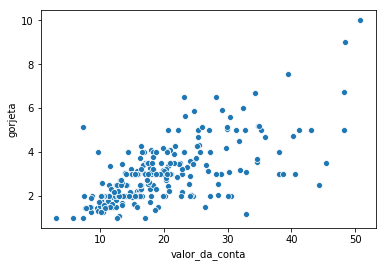

In [63]:
valor_gorjeta = sns.scatterplot(x='valor_da_conta',y='gorjeta',data=gorjetas)

### Visualmente , o valor da gorjeta aumenta proporcionalmenta com o aumento do valor da conta

In [79]:
print(f' A base de dados contém {gorjetas.shape[0]} registros')
print(f'\n Resgistros não nulos: \n\n{gorjetas.count()} \n')

 A base de dados contém 244 registros

 Resgistros não nulos: 

valor_da_conta      244
gorjeta             244
sobremesa           244
dia_da_semana       244
hora_do_dia         244
total_de_pessoas    244
dtype: int64 



## Criando o campo porcentagem

In [80]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2


In [84]:
gorjetas['porcentagem'] = gorjetas['gorjeta']/gorjetas['valor_da_conta']
gorjetas['porcentagem'] =gorjetas['porcentagem'].round(2)
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


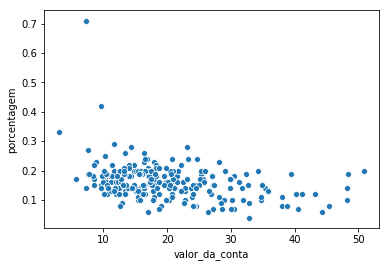

In [85]:
porcentagem_conta = sns.scatterplot(x='valor_da_conta',y= 'porcentagem',data=gorjetas)

### visualmente, o valor da conta não é proporcional ao valor da gorjeta

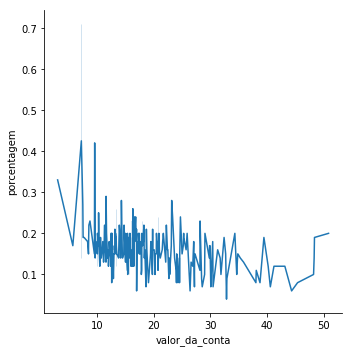

In [88]:
porcentagem_conta_linha = sns.relplot(x='valor_da_conta',y='porcentagem',data=gorjetas,kind='line')

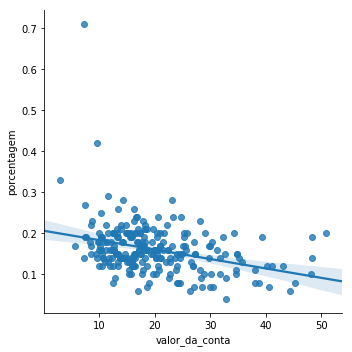

In [90]:
a= sns.lmplot(x='valor_da_conta',y='porcentagem',data=gorjetas)

In [92]:
 a.savefig('gráfico2.png',dpi=300,bbox_inches = 'tight')

## Análise 2 - sobremesa:

In [93]:
gorjetas[gorjetas.sobremesa =='Sim'].describe() 

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [94]:
gorjetas[gorjetas.sobremesa =='Não'].describe() 

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


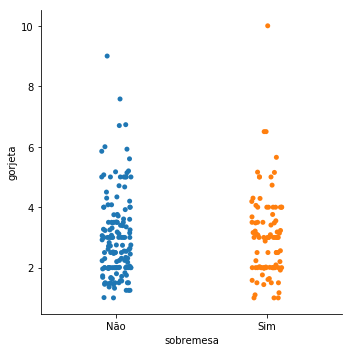

In [95]:
sns.catplot(x='sobremesa',y='gorjeta',data=gorjetas)

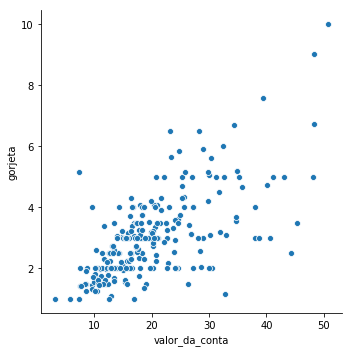

In [99]:
sns.relplot(x='valor_da_conta',y='gorjeta',data=gorjetas)

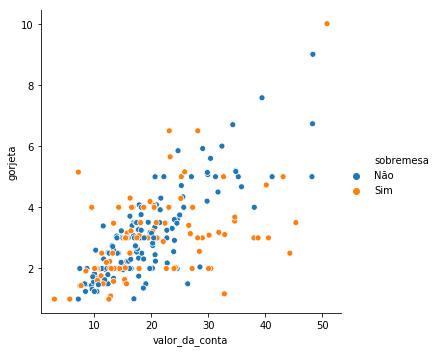

In [100]:
sns.relplot(x='valor_da_conta',y='gorjeta',data=gorjetas, hue='sobremesa')

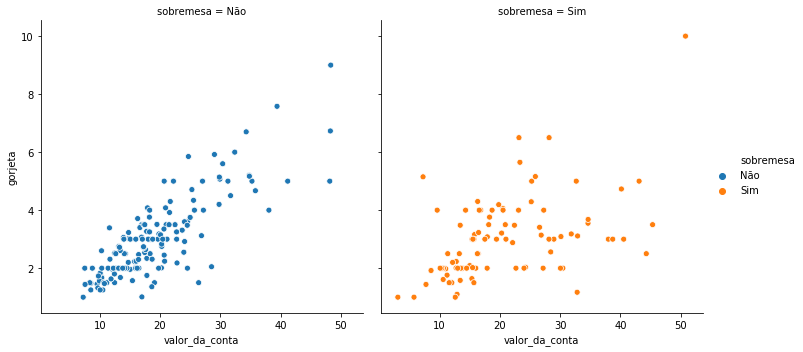

In [101]:
sns.relplot(x='valor_da_conta',y='gorjeta',data=gorjetas,col='sobremesa', hue='sobremesa')

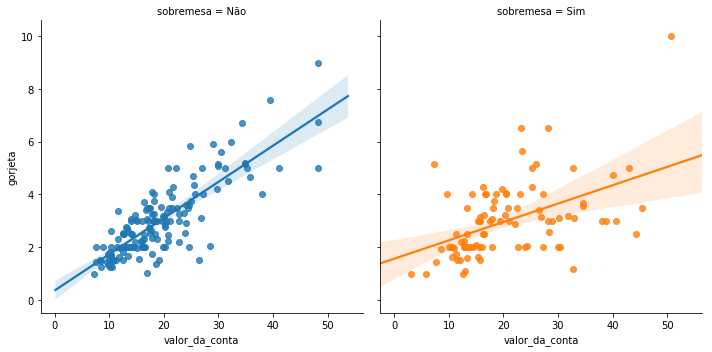

In [103]:
sns.lmplot(x='valor_da_conta',y='gorjeta',col='sobremesa',hue='sobremesa',data=gorjetas)

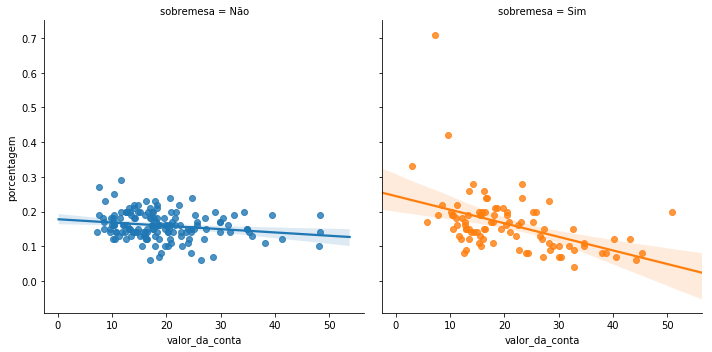

In [104]:
sns.lmplot(x='valor_da_conta',y='porcentagem',col='sobremesa',hue='sobremesa',data=gorjetas)

### Visulamente, existe uma diferença no valor da gorjeta da queles que pediram a sobremesa e da queles que não pediram

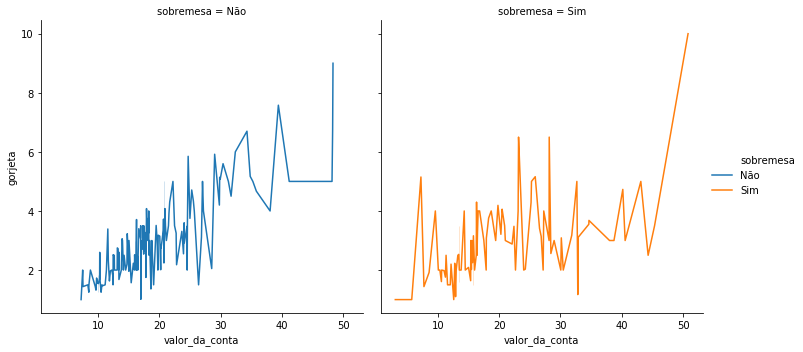

In [110]:
sns.relplot(x='valor_da_conta',y='gorjeta',col='sobremesa',hue='sobremesa',kind ='line', data=gorjetas)

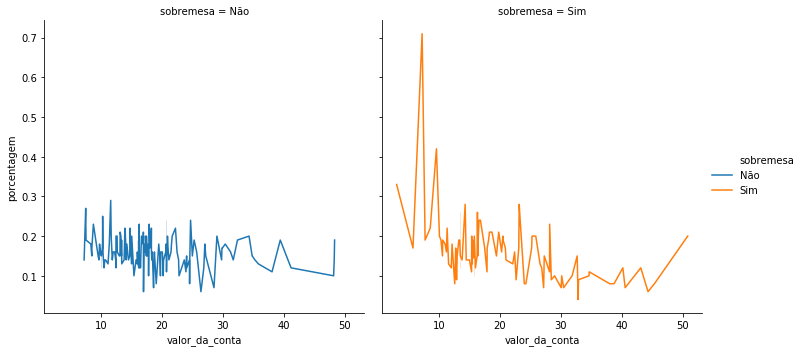

In [111]:
sns.relplot(x='valor_da_conta',y='porcentagem',col='sobremesa',hue='sobremesa',kind ='line', data=gorjetas)

### Teste de hipótese:

**H<sup>null</sup>**
**A distribuição da taxa da gorjeta é a mesma nos dois grupos **

**H<sup>alt</sup>**
**A distribuição da taxa da gorjeta NÃO é a mesma nos dois grupos **

In [112]:
from scipy.stats import ranksums

In [113]:
sobremesa = gorjetas.query('sobremesa == "Sim" ').porcentagem
sem_sobremesa = gorjetas.query('sobremesa == "Não" ').porcentagem

In [115]:
sobremesa.head(5)

56    0.08
58    0.16
60    0.16
61    0.14
62    0.18
Name: porcentagem, dtype: float64

In [116]:
sem_sobremesa.head(5)

0    0.06
1    0.16
2    0.17
3    0.14
4    0.15
Name: porcentagem, dtype: float64

In [121]:
r = ranksums(sobremesa,sem_sobremesa)
r

RanksumsResult(statistic=-0.6331073145314825, pvalue=0.5266635660124415)

In [123]:
print(f'O Valor do Pvalue é {r.pvalue},\nportanto a distribuição é a mesma entre os grupos')

O Valor do Pvalue é 0.5266635660124415,
portanto a distribuição é a mesma entre os grupos


## Análise 3 - dia da semana

In [126]:
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

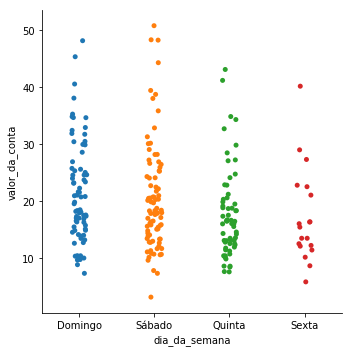

In [128]:
sns.catplot(x='dia_da_semana',y='valor_da_conta',data=gorjetas)

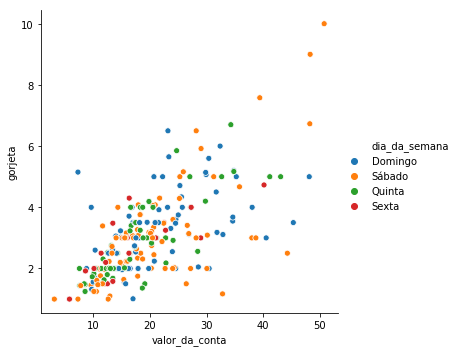

In [130]:
sns.relplot(x='valor_da_conta',y='gorjeta',hue='dia_da_semana',data=gorjetas)

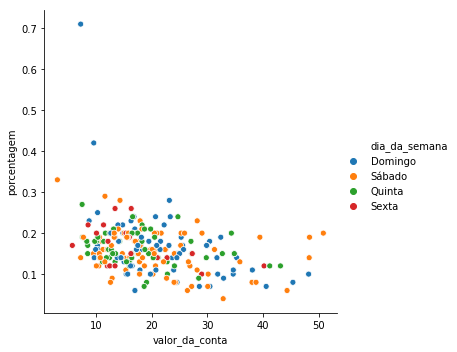

In [131]:
sns.relplot(x='valor_da_conta',y='porcentagem',hue='dia_da_semana',data=gorjetas)

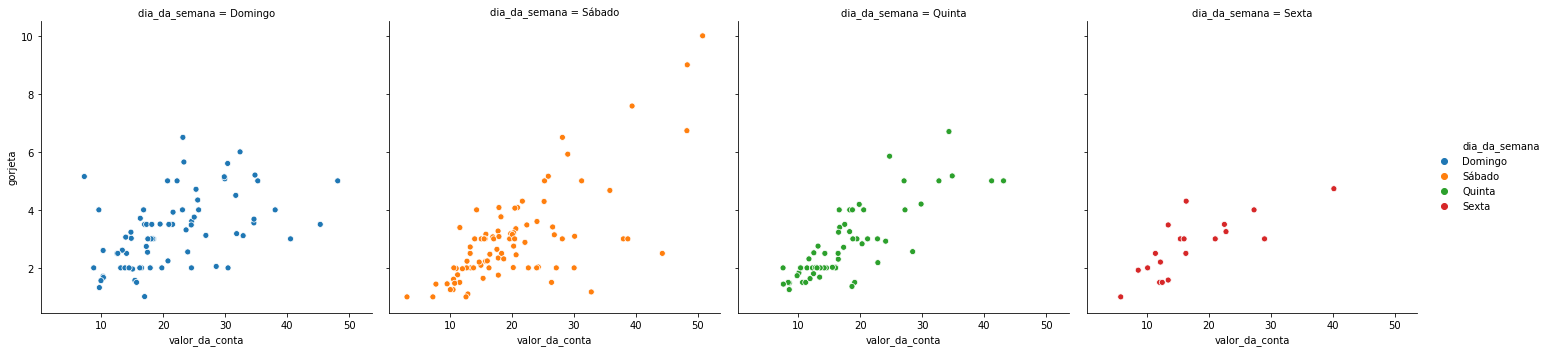

In [133]:
sns.relplot(x='valor_da_conta',y='gorjeta',hue='dia_da_semana',col='dia_da_semana',data=gorjetas)

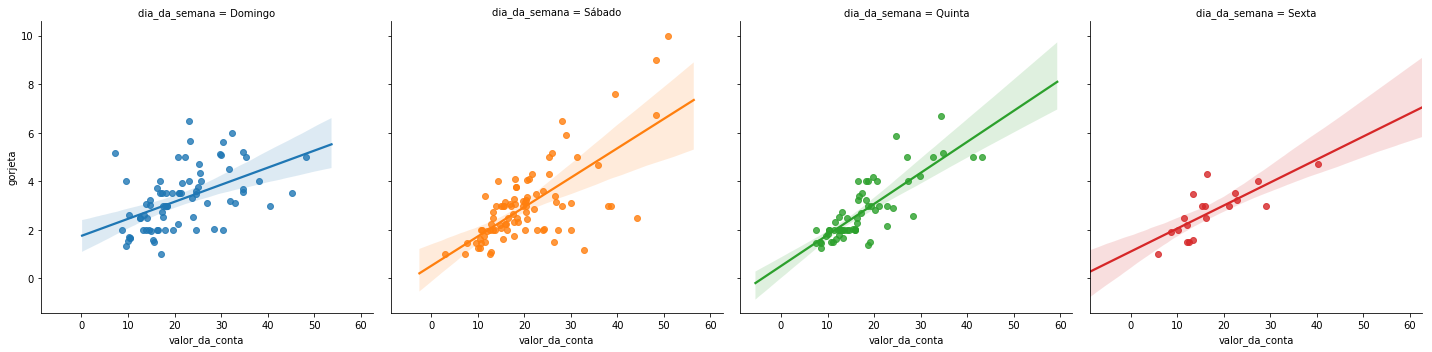

In [134]:
sns.lmplot(x='valor_da_conta',y='gorjeta',hue='dia_da_semana',col='dia_da_semana',data=gorjetas)

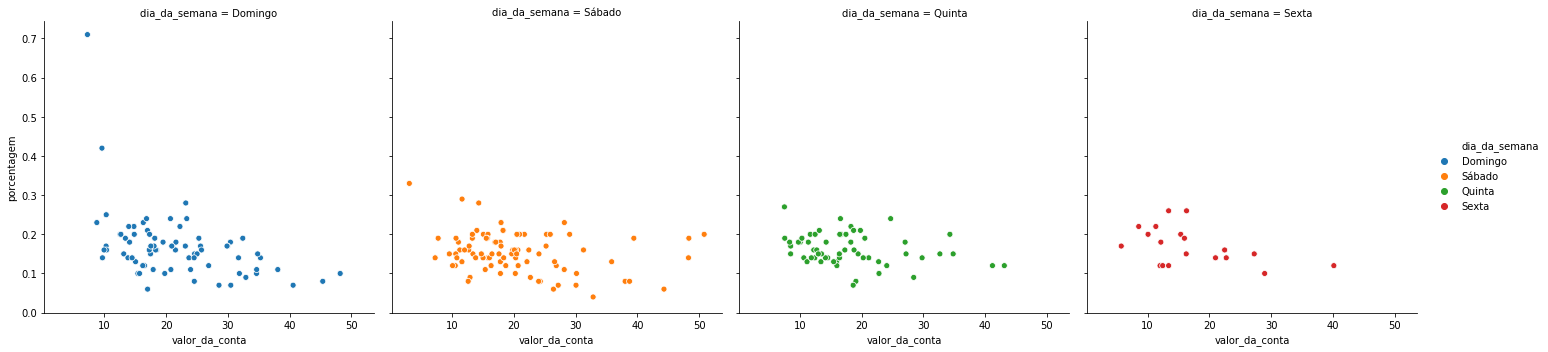

In [135]:
sns.relplot(x='valor_da_conta',y='porcentagem',hue='dia_da_semana',col='dia_da_semana',data=gorjetas)

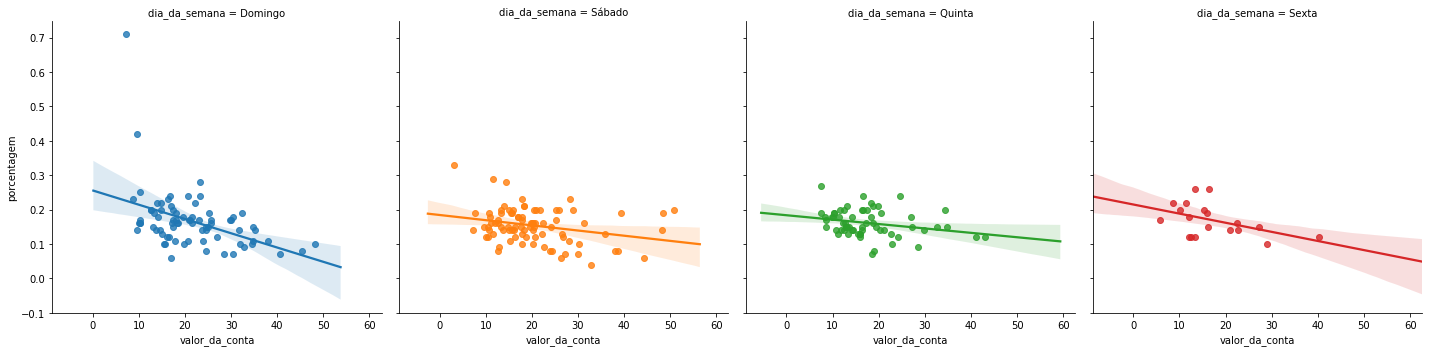

In [136]:
sns.lmplot(x='valor_da_conta',y='porcentagem',hue='dia_da_semana',col='dia_da_semana',data=gorjetas)

In [138]:
media_geral_gorjetas = gorjetas.gorjeta.mean()

In [139]:
print(f'A média geral das gorjetas é de {media_geral_gorjetas}')

A média geral das gorjetas é de 2.9982786885245902


In [142]:
gorjetas.groupby(['dia_da_semana']).mean()[['valor_da_conta','gorjeta','porcentagem']]

,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.410000,3.255132,0.166974
Quinta,17.682742,2.771452,0.161129
Sexta,17.151579,2.734737,0.169474
Sábado,20.441379,2.993103,0.153678


In [151]:
print('Frequencia dos dias:')
gorjetas['dia_da_semana'].value_counts()

Frequencia dos dias:


Sábado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia_da_semana, dtype: int64

### Teste de hipótese:

H**<sup>null</sup>** 
**A distribuição do valor da conta é igual no sábado e no domingo  **

H**<sup>alt</sup>** 
**A distribuição do valor da conta NÂO é igual no sábado e no domingo **

In [153]:
valor_conta_domingo = gorjetas.query('dia_da_semana == "Domingo"').valor_da_conta

In [155]:
valor_conta_domingo.head(5)

0    16.99
1    10.34
2    21.01
3    23.68
4    24.59
Name: valor_da_conta, dtype: float64

In [156]:
valor_conta_sabado = gorjetas.query('dia_da_semana == "Sábado"').valor_da_conta

In [157]:
valor_conta_sabado.head(5)

19    20.65
20    17.92
21    20.29
22    15.77
23    39.42
Name: valor_da_conta, dtype: float64

In [158]:
r2 = ranksums(valor_conta_sabado,valor_conta_domingo)
r2

RanksumsResult(statistic=-0.9198084864360142, pvalue=0.3576728477868443)

### A distribuição do valor da conta é igual no sábado e no domingo

### OBS:
#### Valor p-value maior que 0,05 --> Hipotese nula
#### Valor p-value menos que 0,05 --> Hipotese alt

In [160]:
print(f'O valor do p-value é {r2.pvalue}')

O valor do p-value é 0.3576728477868443


## Análise 4 - Hora do dia

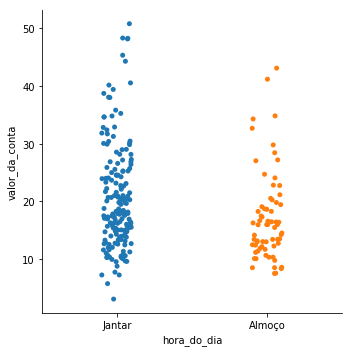

In [161]:
sns.catplot(x='hora_do_dia',y='valor_da_conta',data=gorjetas)

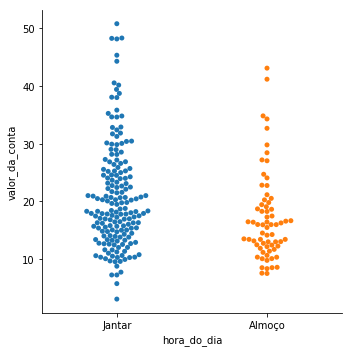

In [162]:
sns.catplot(x='hora_do_dia',y='valor_da_conta',data=gorjetas,kind='swarm')

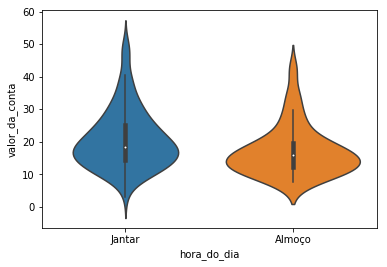

In [166]:
sns.violinplot(x='hora_do_dia',y='valor_da_conta', data=gorjetas)

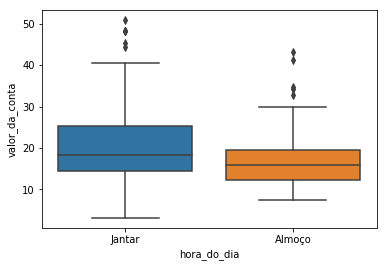

In [168]:
sns.boxplot(x='hora_do_dia',y='valor_da_conta', data= gorjetas)

In [170]:
almoco = gorjetas.query('hora_do_dia == "Almoço"').valor_da_conta

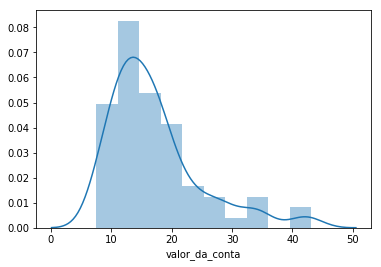

In [172]:
sns.distplot(almoco)

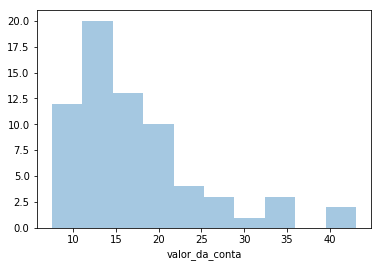

In [173]:
sns.distplot(almoco, kde = False)

In [175]:
jantar = gorjetas.query('hora_do_dia == "Jantar"').valor_da_conta

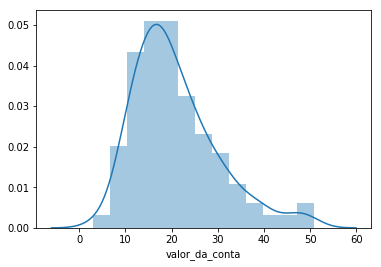

In [176]:
sns.distplot(jantar)

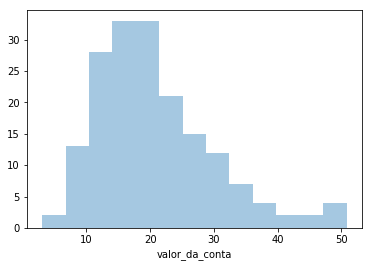

In [177]:
sns.distplot(jantar,kde=False)

In [179]:
gorjetas.groupby(['hora_do_dia']).mean()[['valor_da_conta','gorjeta','porcentagem']]

,valor_da_conta,gorjeta,porcentagem
hora_do_dia,,,
Almoço,17.168676,2.728088,0.163971
Jantar,20.797159,3.102670,0.159773


## Teste de Hipótese:

H**<sup>null</sup>** 
**A distribuição do valor da conta é igual no jantar e no almoço  **

H**<sup>alt</sup>** 
**A distribuição do valor da conta NÂO é igual no jantar e no almoço  **

In [181]:
r3 = ranksums(jantar,almoco)

In [184]:
print(f'O valor do p-value{r3.pvalue}. \nPodemos aceitar a hipotese alternativa, pois as distribuições são diferentes')

O valor do p-value0.0011791039723641672. 
Podemos aceitar a hipotese alternativa, pois as distribuições são diferentes


In [199]:
porcentagem_almoco= gorjetas.query('hora_do_dia == "Almoço"').porcentagem
porcentagem_almoco

77     0.15
78     0.13
79     0.16
80     0.15
81     0.20
82     0.18
83     0.15
84     0.13
85     0.15
86     0.15
87     0.22
88     0.24
89     0.14
117    0.14
118    0.14
119    0.12
120    0.20
121    0.13
122    0.18
123    0.13
124    0.20
125    0.14
126    0.17
127    0.14
128    0.18
129    0.10
130    0.08
131    0.14
132    0.13
133    0.16
       ... 
142    0.12
143    0.18
144    0.14
145    0.18
146    0.07
147    0.14
148    0.18
149    0.27
191    0.21
192    0.09
193    0.13
194    0.24
195    0.19
196    0.19
197    0.12
198    0.15
199    0.15
200    0.21
201    0.16
202    0.15
203    0.15
204    0.19
205    0.20
220    0.18
221    0.26
222    0.22
223    0.19
224    0.12
225    0.15
226    0.20
Name: porcentagem, Length: 68, dtype: float64

In [203]:
porcentagem_jantar = gorjetas.query('hora_do_dia == "Jantar"').porcentagem
porcentagem_jantar

0      0.06
1      0.16
2      0.17
3      0.14
4      0.15
5      0.19
6      0.23
7      0.12
8      0.13
9      0.22
10     0.17
11     0.14
12     0.10
13     0.16
14     0.20
15     0.18
16     0.16
17     0.23
18     0.21
19     0.16
20     0.23
21     0.14
22     0.14
23     0.19
24     0.16
25     0.13
26     0.15
27     0.16
28     0.20
29     0.15
       ... 
207    0.08
208    0.08
209    0.17
210    0.07
211    0.20
212    0.19
213    0.19
214    0.23
215    0.09
216    0.11
217    0.13
218    0.19
219    0.10
227    0.15
228    0.20
229    0.13
230    0.08
231    0.19
232    0.29
233    0.14
234    0.19
235    0.12
236    0.08
237    0.04
238    0.13
239    0.20
240    0.07
241    0.09
242    0.10
243    0.16
Name: porcentagem, Length: 176, dtype: float64

In [204]:
r4 = ranksums(porcentagem_jantar,porcentagem_almoco)
r4

RanksumsResult(statistic=-1.1258018532735787, pvalue=0.2602493995587126)

In [205]:
print(f'O valor do p-value{r4.pvalue}. \nPodemos aceitar a hipotese nula, pois as distribuições são iguais')

O valor do p-value0.2602493995587126. 
Podemos aceitar a hipotese nula, pois as distribuições são iguais
